# **Project Name**    -



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member -**Saurabh Vijaykumar Gaikwad

# **Project Summary -**

Netflix Recommender recommends Netflix movies and TV shows based on a user's favorite movie or TV show. It uses a a K-Means Clustering model to make these recommendations. These models use information about movies and TV shows such as their plot descriptions and genres to make suggestions

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from  third-party Netflix search engine.
As we will see in some future graph that in  2018, the  number of TV shows on Netflix has nearly tripled since 2010. The streaming service number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.


# **General Guidelines** : -

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.

     The additional credits will have advantages over other students during Star Student selection.

             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.


```
# Chart visualization code
```


*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset Loading

In [ ]:
#Load Dataset
dataset=pd.read_csv('/content/drive/My Drive/Colab Notebooks/Alma Better/unsupervised/Netflix_movies_and_tv_shows_clustering.csv')

In [ ]:
#Copy dataset into another variable
df=dataset.copy()

### Dataset First View

In [ ]:
# Dataset First Look
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
df.shape

(7787, 12)

### Dataset Information

In [ ]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
df.duplicated().sum()

0

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
df.isna().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

<Axes: title={'center': 'HeatMap to display null values in dataset'}>

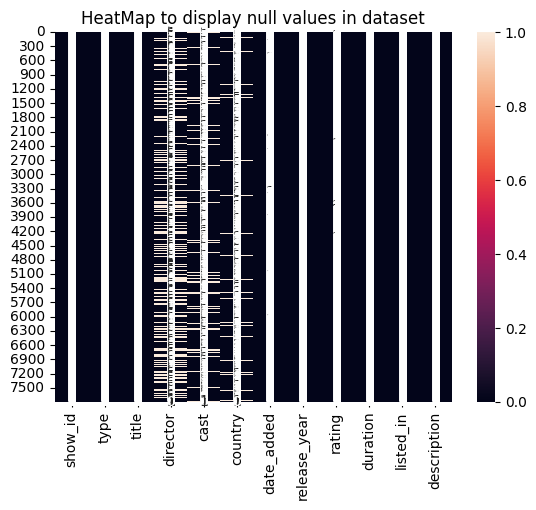

In [ ]:
# Visualizing the missing values
plt.title('HeatMap to display null values in dataset')
sns.heatmap(df.isna(),annot=True)

### What did you know about your dataset?

Here the white lines between and it shows that null values present in dataset so it shows that most number of null values are present in director followed by cast,country,date_added and rating.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

## Fill null values

*   Here in date_added there are only 10 missing values so we can simply drop them.

*   As we don't able to fill wrong director,cast,country for unknown film we
 simply fill unknown in place of null values in director column.


*   At last in place of rating we can fill null values by using mode.





In [ ]:
df[['cast','director','country']]=df[['cast','director','country']].fillna('Unknown')

In [ ]:
df.dropna(axis=0,inplace=True)

In [ ]:
# check does null values are totally filled or not
df.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

## 3. ***Data Wrangling***

### Data Wrangling Code

# Type casting.

In [ ]:
# The duration is the variable which is string type so convert first part of duration variable to int
df['duration']=df['duration'].apply(lambda x: int(x.split()[0]))

### What all manipulations have you done and insights you found?

Answer Here.

In [ ]:
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating  duration  \
0    August 14, 2020          2020  TV-MA         4   
1  December 23, 2016          2016  TV-MA        93   
2  December 20, 2018          2011      R        78   
3  November 16, 2017          2009  PG-13        80   
4    January 1, 2020          2008  PG-13       123   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [ ]:
# The values are in season
df[df['type']=='TV Show'].duration.unique()

array([ 4,  1,  2,  3,  5,  9,  8,  6, 11,  7, 13, 12, 10, 16, 15])

In [ ]:
# The values are in minutes
df[df['type']=='Movie'].duration.unique()

array([ 93,  78,  80, 123,  95, 119, 118, 143, 103,  89,  91, 149, 144,
       124,  87, 110, 128, 117, 100,  84,  99,  90, 102, 104, 105,  56,
       125,  81,  97, 106, 107, 109,  44,  75, 101, 113, 114, 130,  94,
       140, 135,  82,  70, 121,  92, 164,  53,  83, 116,  86, 120,  96,
       126, 129,  77, 137, 148,  28, 122, 176,  85,  22,  68, 111,  29,
       142, 168,  21,  59,  20,  98, 108,  76,  26, 156,  30,  57, 150,
       133, 115, 154, 127, 146, 136,  88, 131,  24, 112,  74,  63,  38,
        25, 174,  60, 153, 158, 151, 162,  54,  51,  69,  64, 147,  42,
        79,  40,  45, 172,  10, 163,  55,  72,  61,  71, 160, 171,  48,
       139, 157,  15,  65, 134, 161,  62, 186,  49,  73,  58, 165, 166,
       138, 159, 141, 132,  52,  67,  34,  66, 312, 180,  47, 155,  14,
       177,  11,   9,  46, 145,   8,  12,  43,  50,  23, 185, 200, 169,
        27, 170, 196,  33, 181, 204,  32,  35, 167, 179, 193,  13, 214,
        17, 173, 192, 209, 187,  41, 182, 224,  37, 233, 189, 15

In [ ]:
#data type of duration
df.duration.dtype

dtype('int64')

# Typecast date_added string to datetime.

In [ ]:
# from string to datetime
df['date_added']=pd.to_datetime(df['date_added'])

In [ ]:
df['date_added'].dtype

dtype('<M8[ns]')

# Rating

In [ ]:
df['rating'].value_counts()

TV-MA       2861
TV-14       1928
TV-PG        804
R            665
PG-13        386
TV-Y         279
TV-Y7        270
PG           247
TV-G         194
NR            83
G             39
TV-Y7-FV       6
UR             5
NC-17          3
Name: rating, dtype: int64

In [ ]:
# We know the rating is designed for spefic group of persons so we can also convert it into age wise such as
rating_age = {'TV-MA':'Adults',
              'R':'Adults',
              'PG-13':'Teens',
              'TV-14':'Young Adults',
              'TV-PG':'Older Kids',
              'NR':'Adults',
              'TV-G':'Kids',
              'TV-Y':'Kids',
              'TV-Y7':'Older Kids',
              'PG':'Older Kids',
              'G':'Kids',
              'NC-17':'Adults',
              'TV-Y7-FV':'Older Kids',
              'UR':'Adults'}
df['age_group'] = df['rating'].replace(rating_age)


In [ ]:
df['age_group'].head()

0    Adults
1    Adults
2    Adults
3     Teens
4     Teens
Name: age_group, dtype: object

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

Text(0.5, 1.0, 'Countplot to display the rating count')

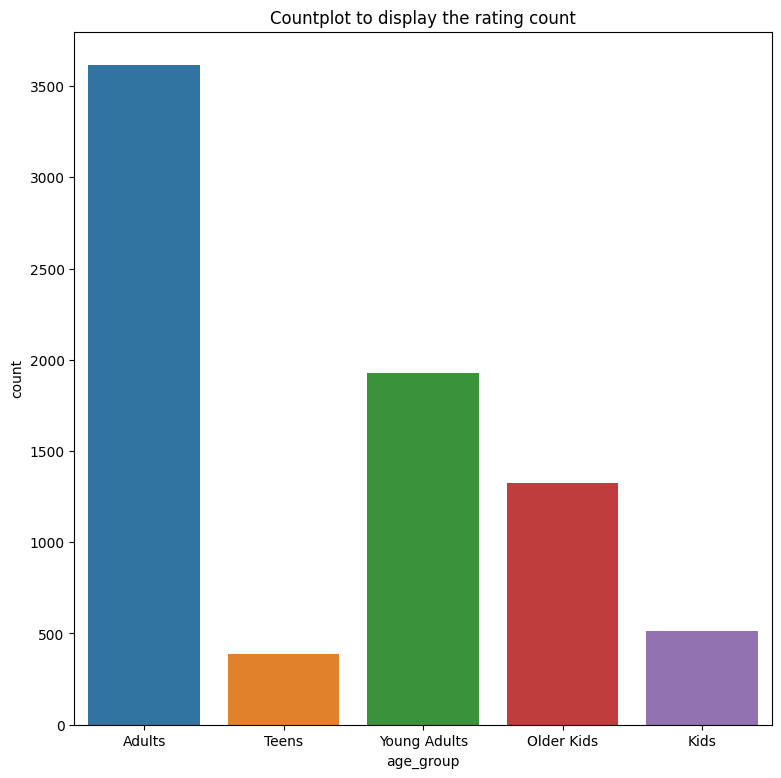

In [ ]:
# Chart - 1 visualization code
# As we modified the rating column so we have to display it in view of countplot
plt.figure(figsize=(9,9))
sns.countplot(x='age_group',data=df)
plt.title('Countplot to display the rating count')

##### 1. Why did you pick the specific chart?

Here countplot is used because it display the rating bar and its count.

##### 2. What is/are the insight(s) found from the chart?

Adult content is in big quntity as compaired to other content.

#### Chart - 2

In [ ]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description',
       'age_group'],
      dtype='object')

Text(0.5, 1.0, 'countplot to display the count of type')

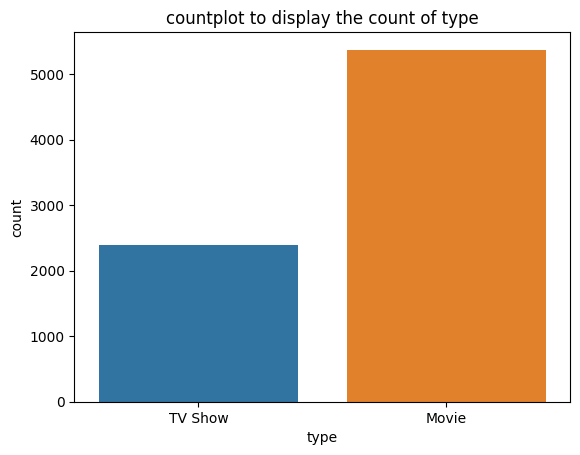

In [ ]:
# Chart - 2 visualization code
sns.countplot(x=df['type'])
plt.title('countplot to display the count of type')

Text(0.5, 1.0, 'The pai plot for display the count of Show')

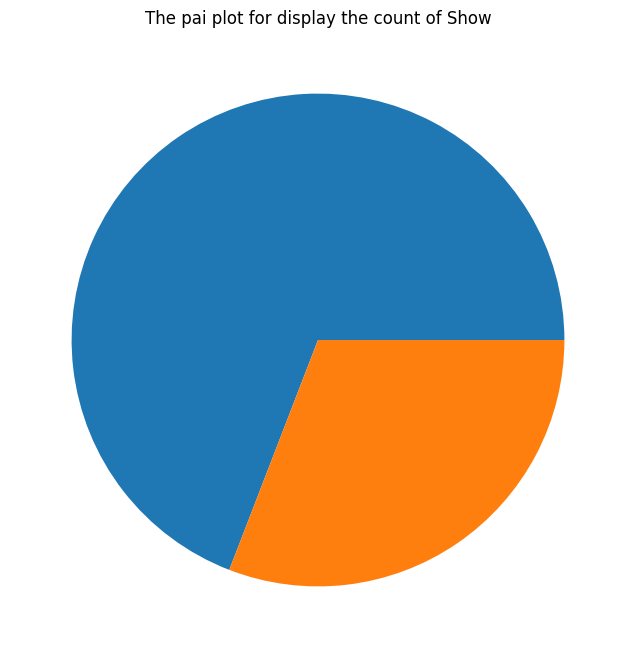

In [ ]:
# count of Type of show
plt.figure(figsize=(9,8))
plt.pie(df.type.value_counts())
plt.title('The pai plot for display the count of Show')

##### 1. Why did you pick the specific chart?

Here as we can see the Movies are more in count as compaired to TV show.

#### Chart - 3

<Axes: xlabel='release_year', ylabel='Density'>

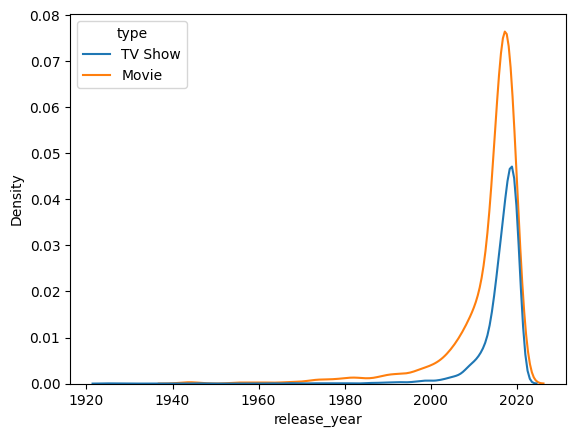

In [ ]:
# Chart - 3 visualization code
sns.kdeplot(x=df['release_year'],hue=df['type'])

##### 1. Why did you pick the specific chart?

This Kde plot show us the distribution of Movies and Tv shows is increasing as we are going towards 2020.

##### 2. What is/are the insight(s) found from the chart?

Movies are realeased more as compaired to Tv show.

#### Chart - 4

Text(0.5, 1.0, 'yearly change in netflix show count')

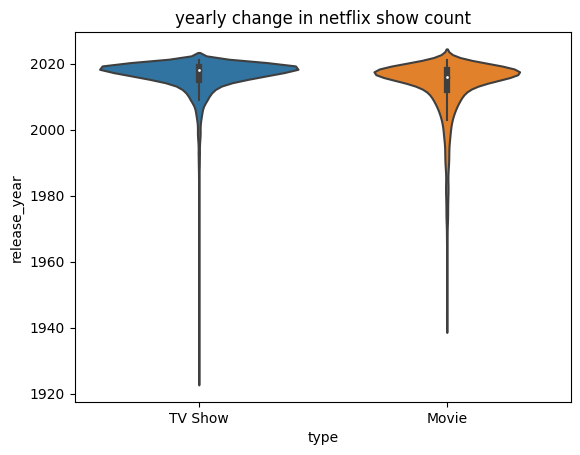

In [ ]:
sns.violinplot(x=df['type'],y=df['release_year'])
plt.title('yearly change in netflix show count')

Text(0.5, 1.0, 'Using stripplot the year wise count of show')

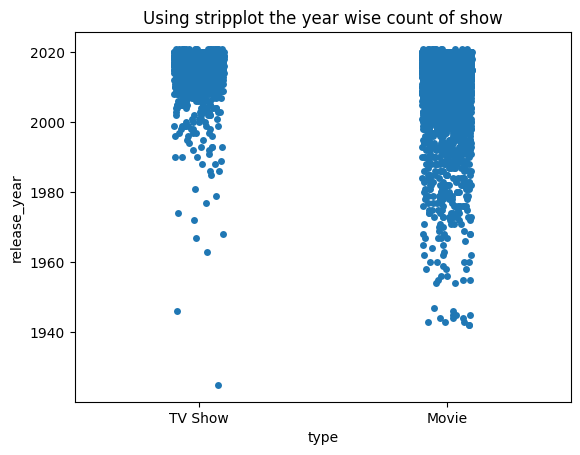

In [ ]:
sns.stripplot(x=df['type'],y=df['release_year'])
plt.title('Using stripplot the year wise count of show')

##### 1. Why did you pick the specific chart?


From these two graph the one can easily conclude that compaired to 2000 and before it tv show and Movies are more in count after 2000.

#### Chart - 5

In [ ]:
#store month from date_added column
df['month']=pd.DatetimeIndex(df['date_added']).month

In [ ]:
# value count the month
df['month'].value_counts()

12    832
10    785
1     756
11    738
3     668
9     618
8     617
7     600
4     600
5     543
6     542
2     471
Name: month, dtype: int64

Text(0.5, 1.0, 'Month and their show releas rate')

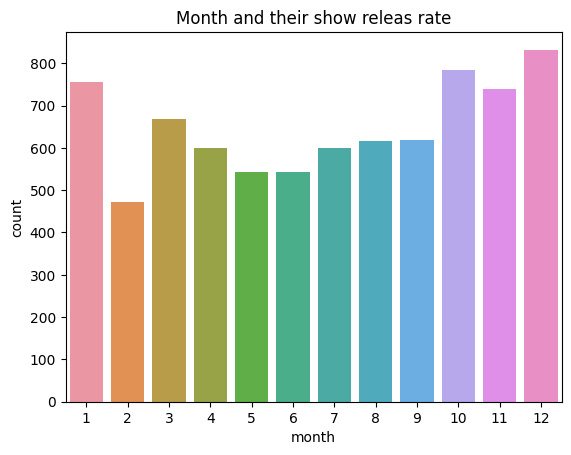

In [ ]:
sns.countplot(x=df.month)
plt.title('Month and their show releas rate')

##### 2. What is/are the insight(s) found from the chart?

From this chart we understand that most number of showes are released in octomber,november,december and january

#### Chart - 6

Text(0.5, 1.0, 'Number of seasons per TV show distribution')

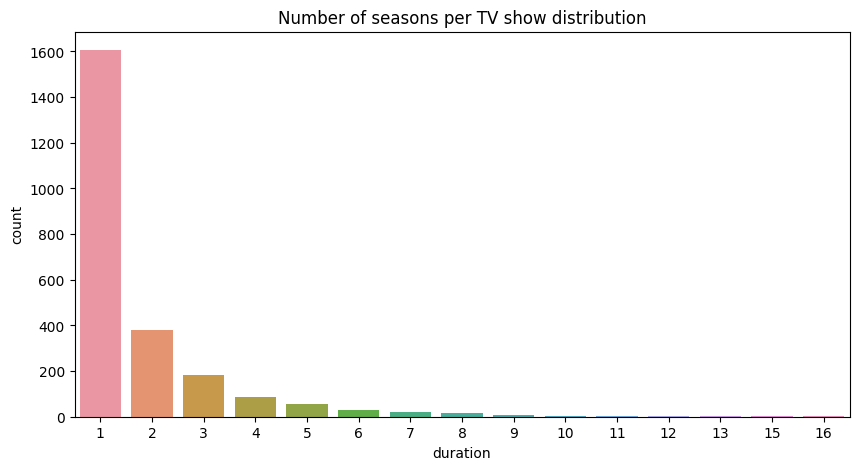

In [ ]:
# Chart - 6 visualization code
plt.figure(figsize=(10,5))
sns.countplot(x='duration',data=df[df['type']=='TV Show'])
plt.title('Number of seasons per TV show distribution')

##### 1. What is/are the insight(s) found from the chart?

By understanding this graph we can say that most number of series are of only 1 season .

#### Chart - 7

Text(0.5, 1.0, 'Movie duration distribution')

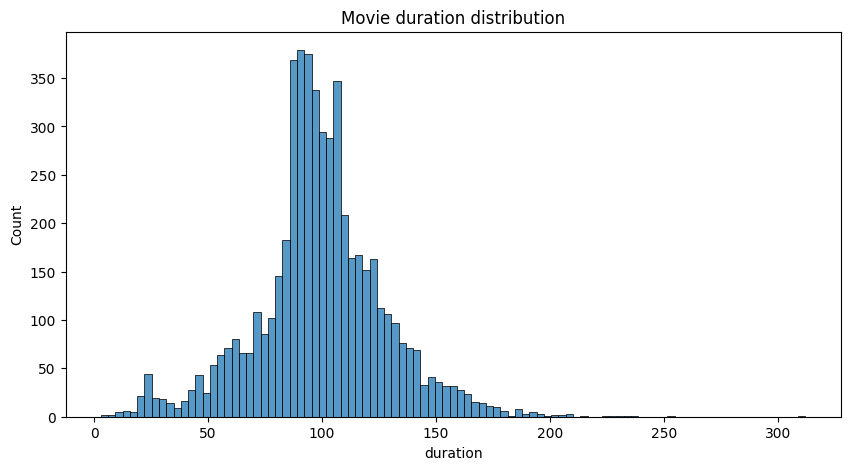

In [ ]:
# Movie distribution and duration
plt.figure(figsize=(10,5))
sns.histplot(x='duration',data=df[df['type']=='Movie'])
plt.title('Movie duration distribution')

##### 2. What is/are the insight(s) found from the chart?

Here in chart the distribution is likely normal dirstibuted.And the durition is mostly lies in between 80 to 100 or 110 miutes.

#### Chart - 8

Text(0.5, 1.0, 'Rating according to age')

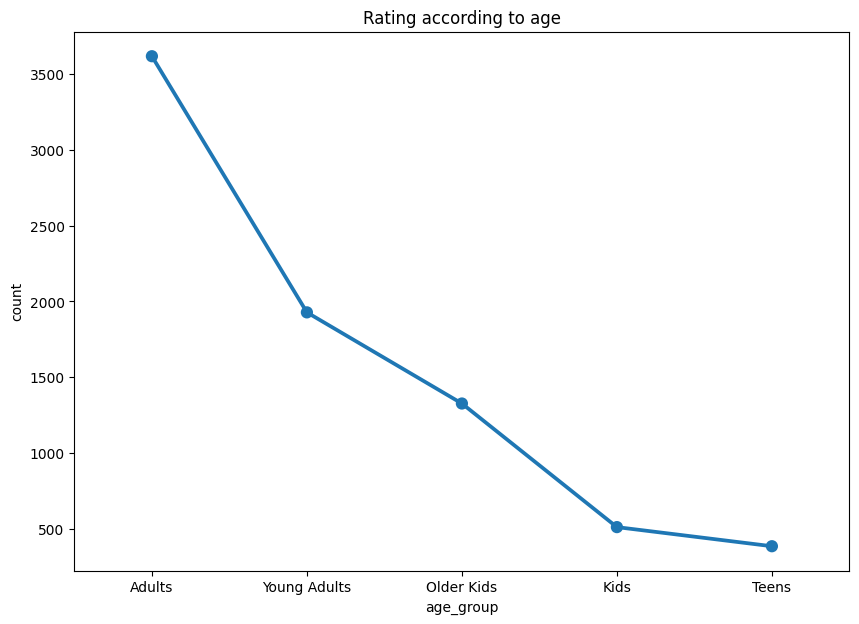

In [ ]:
tv_ratings = df.groupby(['age_group'])['show_id'].count().reset_index(name='count').sort_values(by='count',ascending=False)
plt.figure(figsize=(10,7))
sns.pointplot(x='age_group',y='count',data=tv_ratings)
plt.title('Rating according to age')

In [ ]:
df.rating.tail()

7782    TV-MA
7783    TV-14
7784    TV-MA
7785    TV-PG
7786    TV-MA
Name: rating, dtype: object

##### 2. What is/are the insight(s) found from the chart?

Here in this chart the lineplot clearly explain the rating count is more in case of Adults compaired to other.

#### Chart - 9

Text(0.5, 1.0, 'Movie and tv shows monthly count')

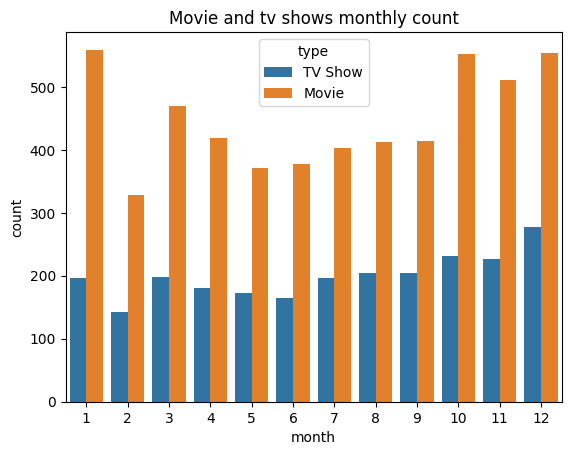

In [ ]:
# Chart - 9 visualization code
sns.countplot(x='month',hue='type',data=df)
plt.title('Movie and tv shows monthly count')

##### 2. What is/are the insight(s) found from the chart?

Here in this count plot as bars of movie are higher than tv show we can say that movie re released as compaired to series on each month count.

#### Chart - 10

Text(0.5, 1.0, 'Top 10 genre')

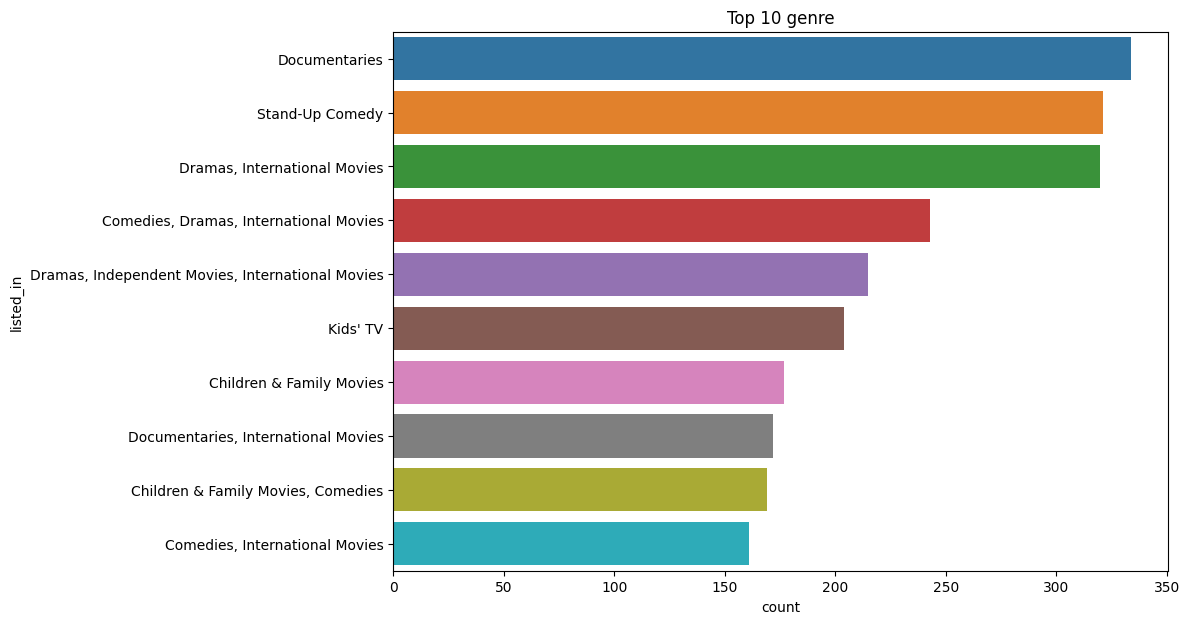

In [ ]:
# Chart - 10 visualization code
# Top genre count
plt.figure(figsize=(10,7))
sns.countplot(y=df['listed_in'],data=df,order=df['listed_in'].value_counts().index[0:10])
plt.title('Top 10 genre')

##### 2. What is/are the insight(s) found from the chart?

This chart show the Docunmentries has more count as compaired to any other.

#### Chart - 11

Text(0.5, 1.0, 'top 15 country and with content')

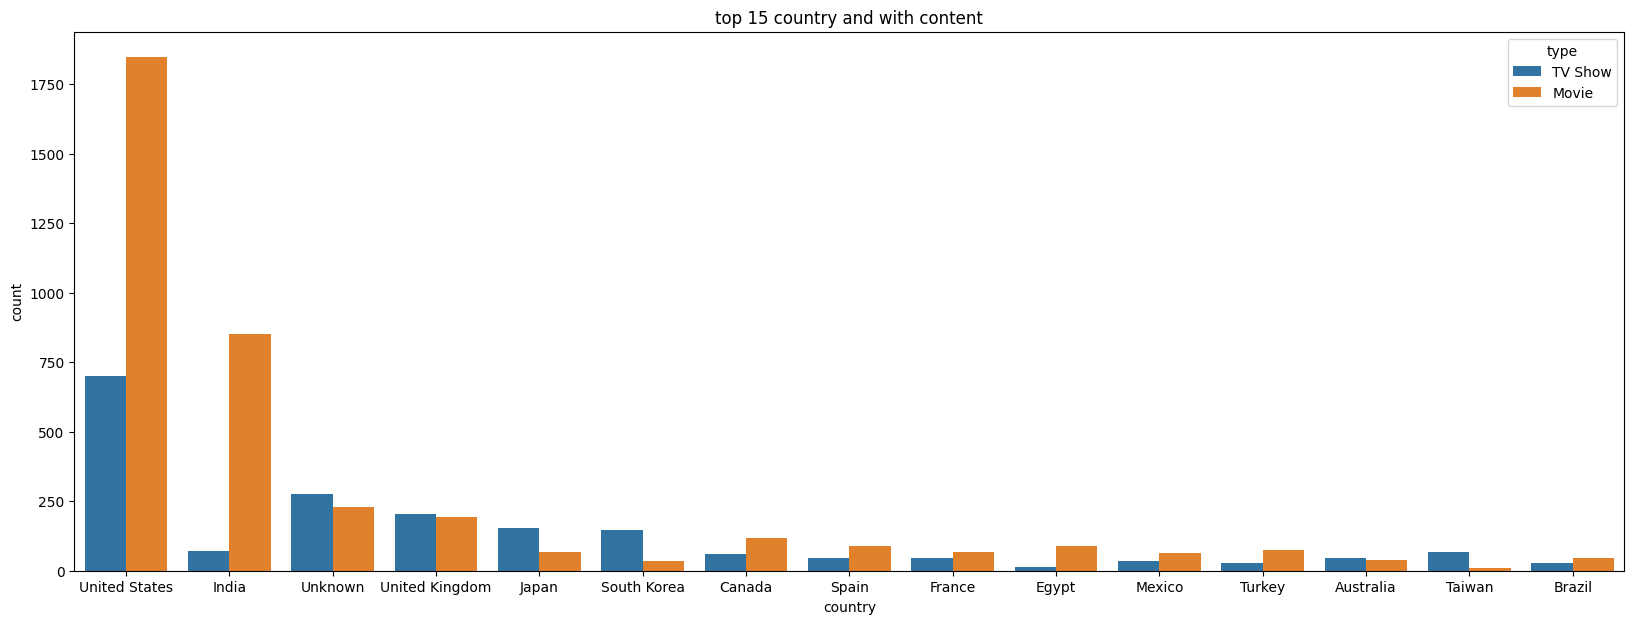

In [ ]:
# Chart - 11 visualization code
plt.figure(figsize=(20,7))
sns.countplot(x=df['country'],order=df['country'].value_counts().index[0:15],hue=df['type'])
plt.title('top 15 country and with content')

##### 2. What is/are the insight(s) found from the chart?

from this chart we pick united state has most number of content and in this content also the movies are more in count followed by India.

#### Chart - 12 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
df['count'] = 1
data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]
data = data['country']

df_heatmap = df.loc[df['country'].isin(data)]
df_heatmap = pd.crosstab(df_heatmap['country'],df_heatmap['age_group'],normalize = "index").T
df_heatmap

<ipython-input-44-41a528ee5d32>:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = df.groupby('country')[['country','count']].sum().sort_values(by='count',ascending=False).reset_index()[:10]


country         Canada     Egypt    France     India     Japan  South Korea  \
age_group                                                                     
Adults        0.446328  0.277228  0.678261  0.255688  0.366071     0.469945   
Kids          0.180791  0.000000  0.095652  0.016251  0.008929     0.027322   
Older Kids    0.225989  0.039604  0.060870  0.160347  0.272321     0.120219   
Teens         0.016949  0.000000  0.008696  0.004334  0.013393     0.000000   
Young Adults  0.129944  0.683168  0.156522  0.563380  0.339286     0.382514   

country          Spain  United Kingdom  United States   Unknown  
age_group                                                        
Adults        0.835821        0.512626       0.502357  0.318812  
Kids          0.022388        0.093434       0.073449  0.170297  
Older Kids    0.044776        0.204545       0.187353  0.235644  
Teens         0.007463        0.017677       0.089159  0.005941  
Young Adults  0.089552        0.171717       0.147683  0.269307

In [ ]:
df_heatmap.columns

Index(['Canada', 'Egypt', 'France', 'India', 'Japan', 'South Korea', 'Spain',
       'United Kingdom', 'United States', 'Unknown'],
      dtype='object', name='country')

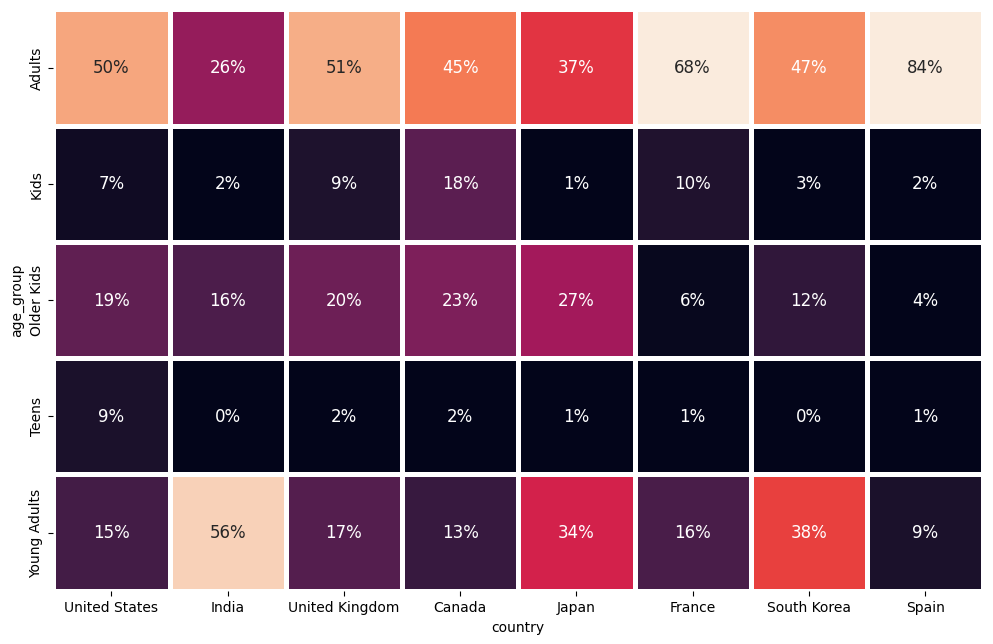

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(12, 12))

country_list = ['United States', 'India', 'United Kingdom', 'Canada', 'Japan', 'France', 'South Korea', 'Spain']

age_list = ['Adults','Kids','Older Kids','Teens','Young Adults']

sns.heatmap(df_heatmap.loc[age_list,country_list],square=True, linewidth=2.5,cbar=False,
            annot=True,fmt='1.0%',vmax=.6,vmin=0.05,ax=ax,annot_kws={"fontsize":12})
plt.show()

##  **Feature Engineering & Data Pre-processing**

### 1. Handling Missing Values

**Remove stop word and lower case**

In [ ]:
# import nltk for stopward
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
sw=stopwords.words('english')
np.array(sw)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
#remove stop words
def stopwords(text):
  text=[word.lower() for word in text.split() if word.lower() not in sw]
  return ' '.join(text)

In [ ]:
# Combining all the clustering attributes into a single column

df['clustering_attributes'] = (df['director'] + ' ' +
                                df['cast'] +' ' +
                                df['country'] +' ' +
                                df['listed_in'] +' ' +
                                df['description'])

In [ ]:
df['clustering_attributes'] = df['clustering_attributes'].apply(stopwords)

In [ ]:
df['clustering_attributes'][40]


'muharrem gülmez erdem yener, ayhan taş, emin olcay, muharrem gülmez, elif nur kerkük, tarık papuççuoğlu, suzan aksoy, doğa konakoğlu, esin eden, deniz özerman turkey comedies, international movies slacker owner public bath house rallies community save big developer comes town close open new mall.'

# **Lemmatization:**

In [ ]:
# function to lemmatize the corpus
from nltk.stem import LancasterStemmer, WordNetLemmatizer

def lemmatize_verbs(words):
    """Lemmatize verbs in list of tokenized words"""
    lemmatizer = WordNetLemmatizer()
    lemmas = []
    for word in words:
        lemma = lemmatizer.lemmatize(word, pos='v')
        lemmas.append(lemma)
    return lemmas


In [ ]:
nltk.download('wordnet')
df['clustering_attributes'] = lemmatize_verbs(df['clustering_attributes'])

[nltk_data] Downloading package wordnet to /root/nltk_data...


# **Tokenization:**

In [ ]:
from nltk.tokenize import TweetTokenizer
tokenizer=TweetTokenizer()
df['clustering_attributes'] = df['clustering_attributes'].apply(lambda x: tokenizer.tokenize(x))

# **Vectorization**

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
clustering_data = df['clustering_attributes']
# Tokenization
def identity_tokenizer(text):
    return text

# Using TFIDF vectorizer to vectorize the corpus
# max features = 20000 to prevent system from crashing
tfidf = TfidfVectorizer(tokenizer=identity_tokenizer, stop_words='english', lowercase=False,max_features = 20000)
X = tfidf.fit_transform(clustering_data)

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:409: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['b', 'c', 'd', 'e', 'f', 'g', 'h', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y'] not in stop_words.
  warnings.warn(


In [ ]:
X

<7770x20000 sparse matrix of type '<class 'numpy.float64'>'
	with 257783 stored elements in Compressed Sparse Row format>

In [ ]:
X=X.toarray()

In [ ]:
df.head()

show_id     type  title           director  \
0      s1  TV Show     3%            Unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

  date_added  release_year rating  duration  \
0 2020-08-14          2020  TV-MA         4   
1 2016-12-23          2016  TV-MA        93   
2 2018-12-20          2011      R        78   
3 2017-11-16          2009  PG-13        80   
4 2020-01-01          2008  PG-13       123   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description age_group  month  count  \
0  In a future where the elite inhabit an island ...    Adults      8      1   
1  After a devastating earthquake hits Mexico Cit...    Adults     12      1   
2  When an army recruit is found dead, his fellow...    Adults     12      1   
3  In a postapocalyptic world, rag-doll robots hi...     Teens     11      1   
4  A brilliant group of students become card-coun...     Teens      1      1   

                               clustering_attributes  
0  [unknown, joão, miguel, ,, bianca, comparato, ...  
1  [jorge, michel, grau, demián, bichir, ,, hécto...  
2  [gilbert, chan, tedd, chan, ,, stella, chung, ...  
3  [shane, acker, elijah, wood, ,, john, c, ., re...  
4  [robert, luketic, jim, sturgess, ,, kevin, spa...

# **Dimensionality reduction using PCA**

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
pca=PCA(random_state=1)
pca.fit(X)

PCA(random_state=1)

Text(0, 0.5, 'cumulative explained variance')

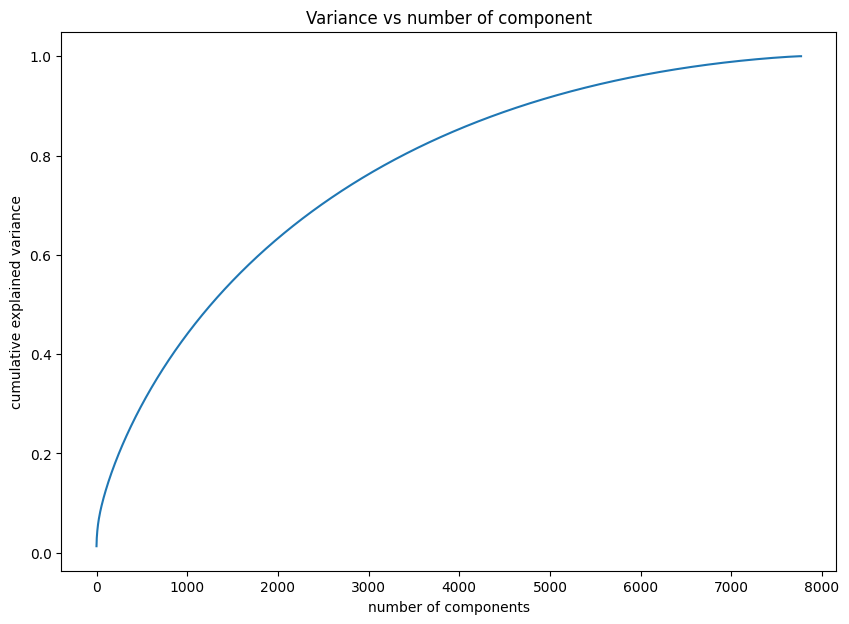

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Variance vs number of component')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
pca = PCA(n_components=4500,random_state=42)
pca.fit(X)

PCA(n_components=4500, random_state=42)

In [ ]:
x_pca = pca.transform(X)

## ***7. ML Model Implementation***

### ML Model - 1

# K-Means Clustering:

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'wcss')

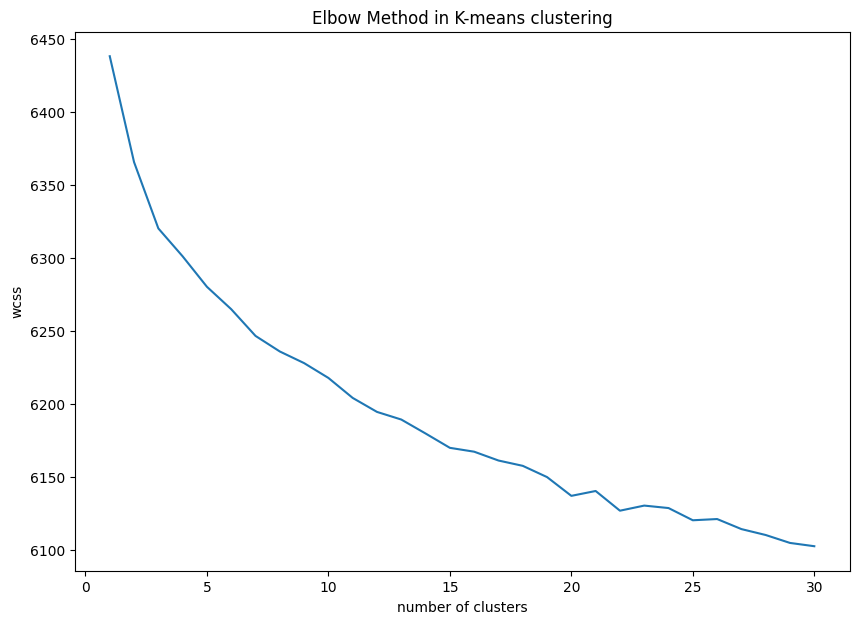

In [ ]:
#elbow method for number of clusters
# ML Model - 1 Implementation
from sklearn.cluster import KMeans
wcss=[]
for i in range(1,31):
  kmeans=KMeans(n_clusters=i,init='k-means++',random_state=20)
  kmeans.fit(x_pca)
  wcss_iter=kmeans.inertia_
  wcss.append(wcss_iter)

number_clusters=range(1,31)
plt.figure(figsize=(10,7))
plt.plot(number_clusters,wcss)
plt.title('Elbow Method in K-means clustering')
plt.xlabel('number of clusters')
plt.ylabel('wcss')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

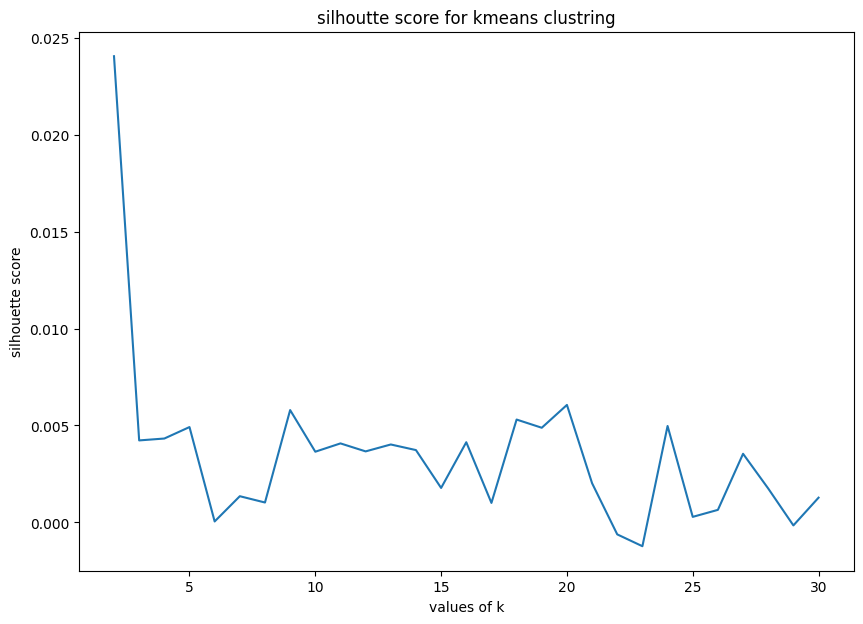

In [ ]:
# silhouette score chart for number of clusters
from sklearn.metrics import silhouette_score
range_silh=range(2,31)
silho_avg=[]
for num_clusters in range_silh:
  kmeans=KMeans(n_clusters=num_clusters,init='k-means++',random_state=20)
  kmeans.fit(x_pca)
  cluster_labels=kmeans.labels_
  silho_avg.append(silhouette_score(x_pca,cluster_labels))
plt.figure(figsize=(10,7))
plt.plot(range_silh,silho_avg)
plt.xlabel('values of k')
plt.ylabel('silhouette score')
plt.title('silhoutte score for kmeans clustring')
plt.show()

In [ ]:
kmeans=KMeans(n_clusters=6,init='k-means++',random_state=20)
kmeans.fit(x_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=20)

In [ ]:
kmeans_distortion=kmeans.inertia_
kmeans_silhouette_score=silhouette_score(x_pca,kmeans.labels_)
print((kmeans_distortion,kmeans_silhouette_score))

(6264.921144461831, 5.1614589048177786e-05)


In [ ]:
df['kmeans_cluster']=kmeans.labels_

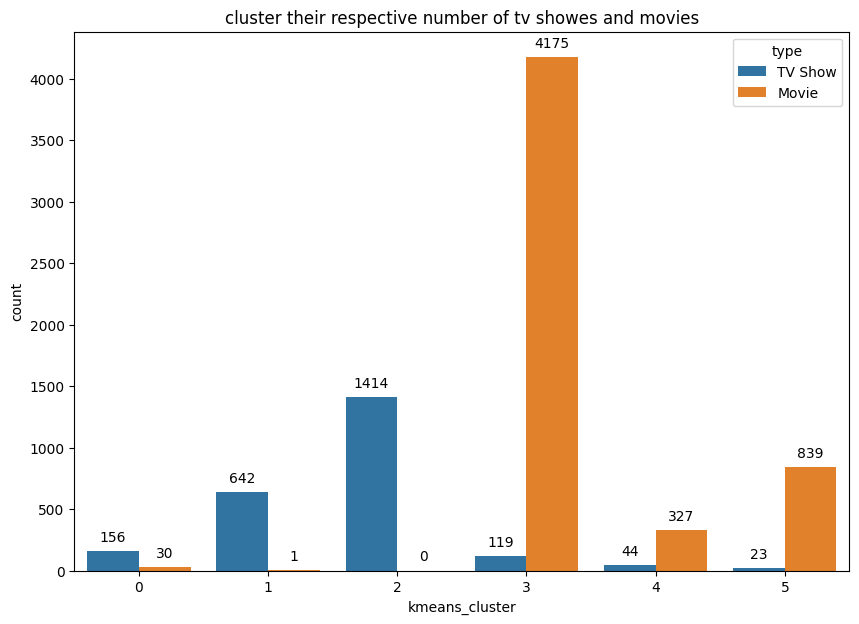

In [ ]:
plt.figure(figsize=(10,7))
a=sns.countplot(x='kmeans_cluster',data=df,hue='type')
plt.title('cluster their respective number of tv showes and movies')
for i in a.patches:
  a.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
# Building a wordcloud for the movie descriptions
from wordcloud import WordCloud, STOPWORDS
def kmeans_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df[df['kmeans_cluster']==cluster_num].description.values:

      # typecaste each val to string
      val = str(val)

      # split the value
      tokens = val.split()

      # Converts each token into lowercase
      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

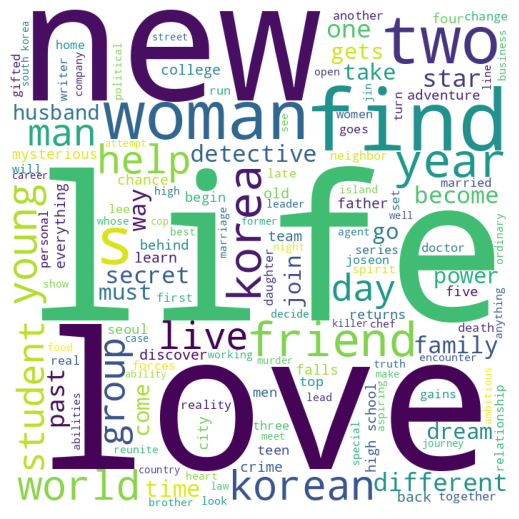

In [ ]:
kmeans_worldcloud(0)

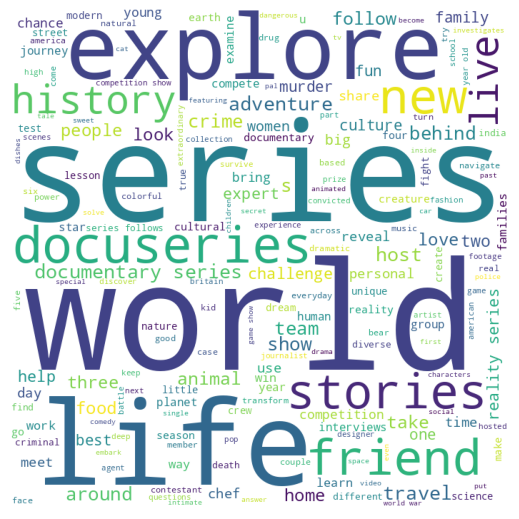

In [ ]:
kmeans_worldcloud(1)

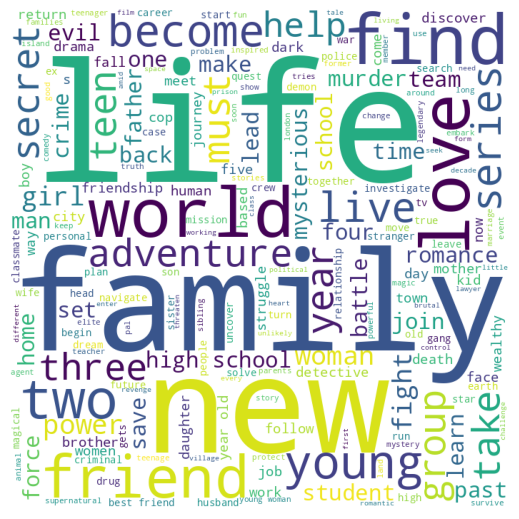

In [ ]:
kmeans_worldcloud(2)

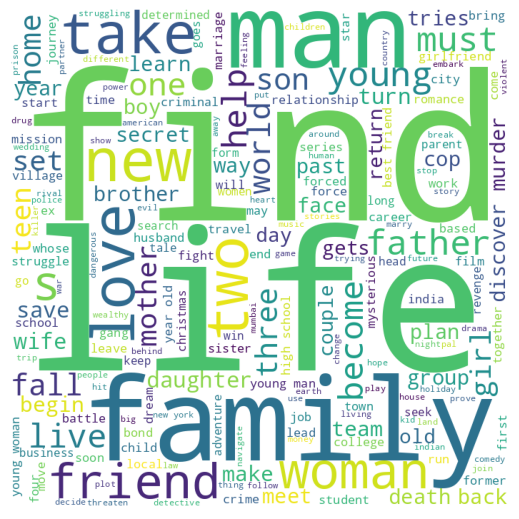

In [ ]:
kmeans_worldcloud(3)

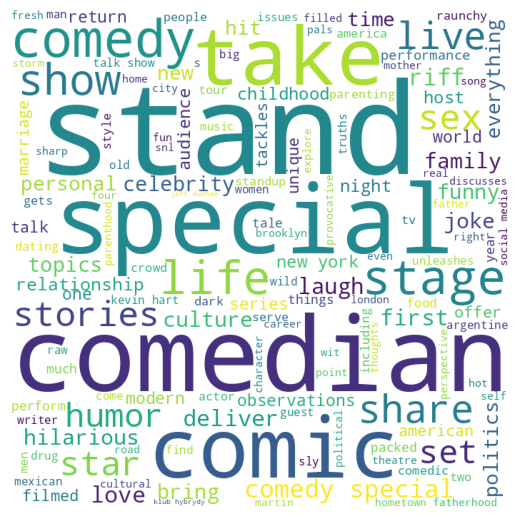

In [ ]:
kmeans_worldcloud(4)

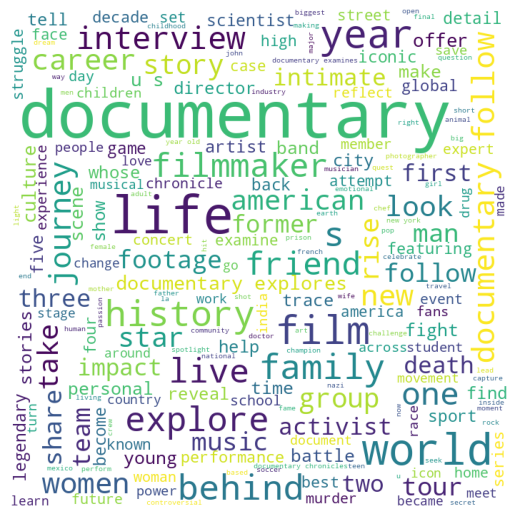

In [ ]:
kmeans_worldcloud(5)

### ML Model - 2

 **Hierarchical clustering**

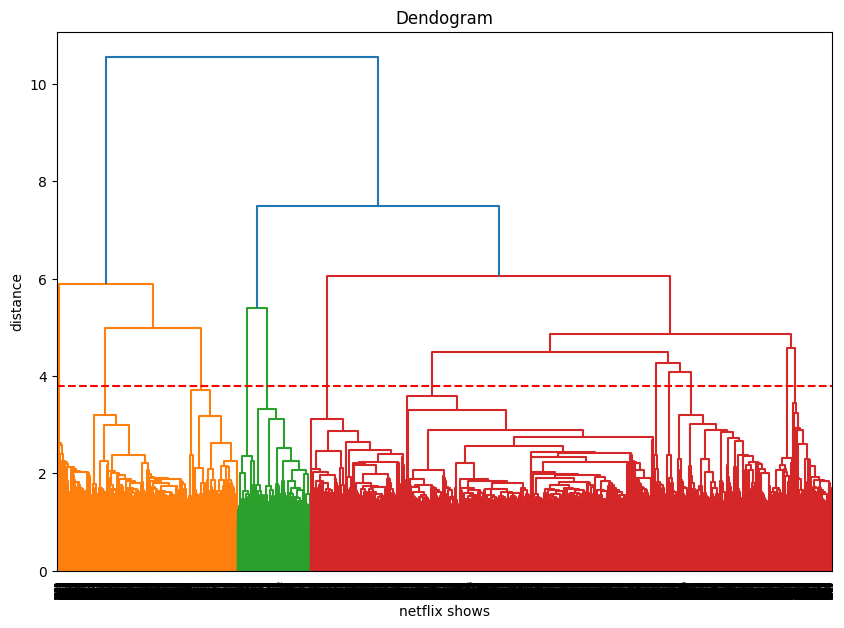

In [ ]:
#dendogram
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
graph = shc.dendrogram(shc.linkage(x_pca, method='ward'))
plt.title('Dendogram')
plt.xlabel('netflix shows')
plt.ylabel('distance')
plt.axhline(y=3.8,color='r',linestyle=('--'))

In [ ]:
hierarchical=AgglomerativeClustering(n_clusters=12,affinity='euclidean',linkage='ward')
hierarchical.fit_predict(x_pca)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([4, 4, 2, ..., 6, 0, 6])

In [ ]:
df['hierarchical_cluster']=hierarchical.labels_

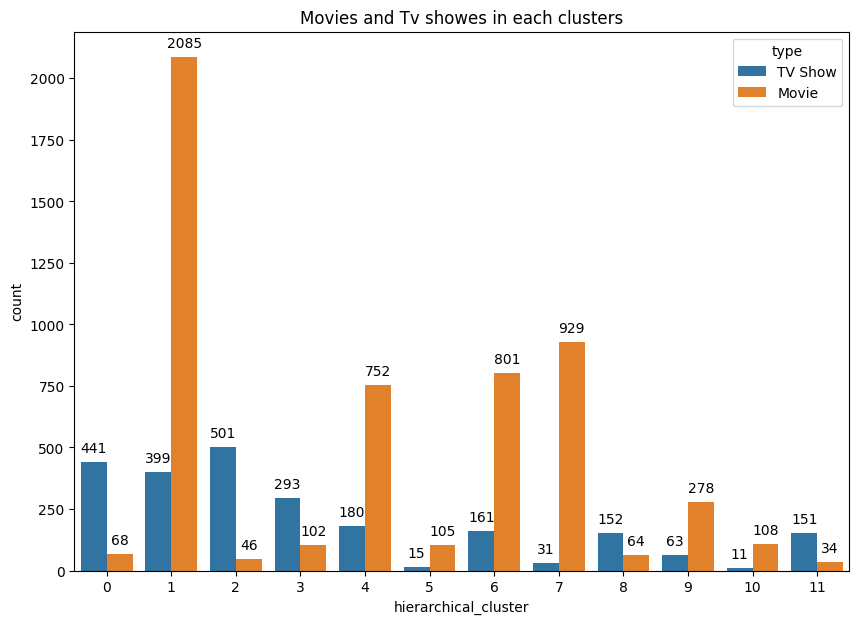

In [ ]:
# movies and Tv shows in each clusters
plt.figure(figsize=(10,7))
a=sns.countplot(x='hierarchical_cluster',data=df,hue='type')
plt.title('Movies and Tv showes in each clusters')
for i in a.patches:
    a.annotate(format(i.get_height(), '.0f'), (i.get_x() + i.get_width() / 2., i.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

In [ ]:
def hierarchical_worldcloud(cluster_num):
  comment_words = ''
  stopwords = set(STOPWORDS)

  # iterate through the csv file
  for val in df[df['hierarchical_cluster']==cluster_num].description.values:

      val = str(val)

      tokens = val.split()

      for i in range(len(tokens)):
          tokens[i] = tokens[i].lower()

      comment_words += " ".join(tokens)+" "

  wordcloud = WordCloud(width = 700, height = 700,
                  background_color ='white',
                  stopwords = stopwords,
                  min_font_size = 10).generate(comment_words)


  # plot the WordCloud image
  plt.figure(figsize = (10,5), facecolor = None)
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.tight_layout(pad = 0)

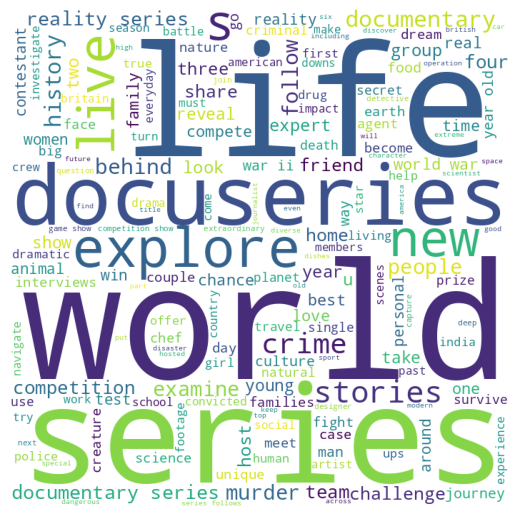

In [ ]:
hierarchical_worldcloud(0)

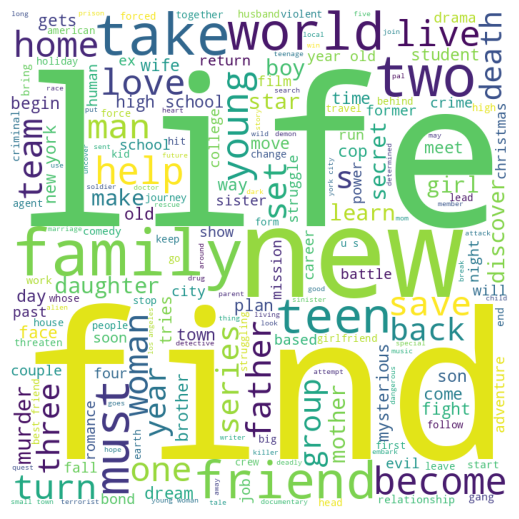

In [ ]:
hierarchical_worldcloud(1)

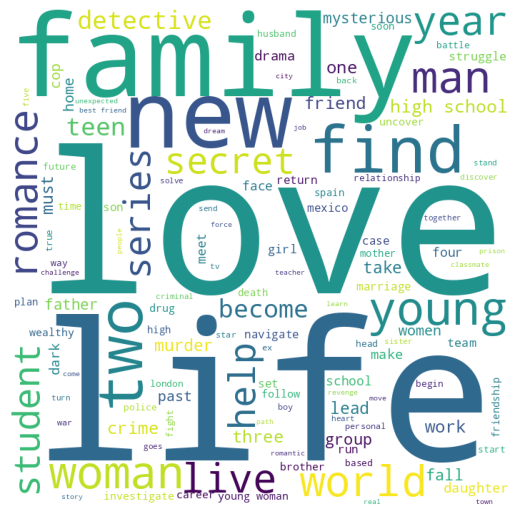

In [ ]:
hierarchical_worldcloud(2)

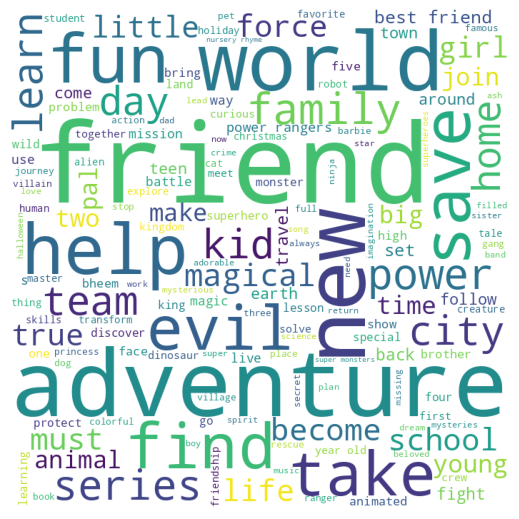

In [ ]:
hierarchical_worldcloud(3)

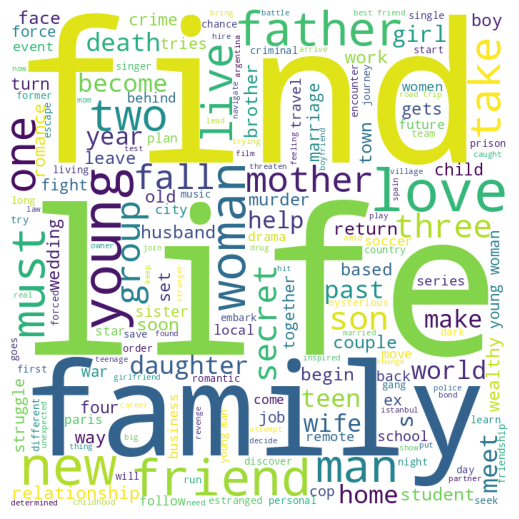

In [ ]:
hierarchical_worldcloud(4)

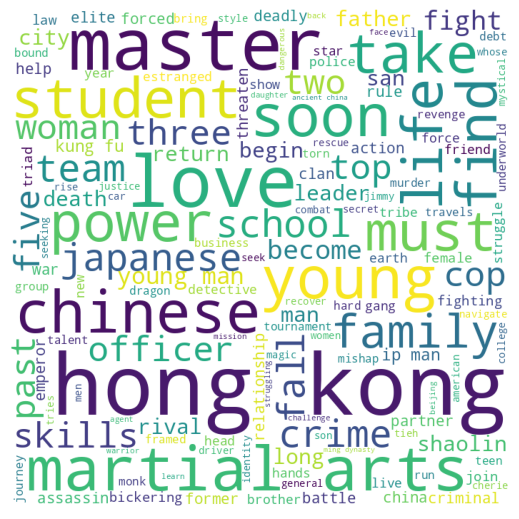

In [ ]:
hierarchical_worldcloud(5)

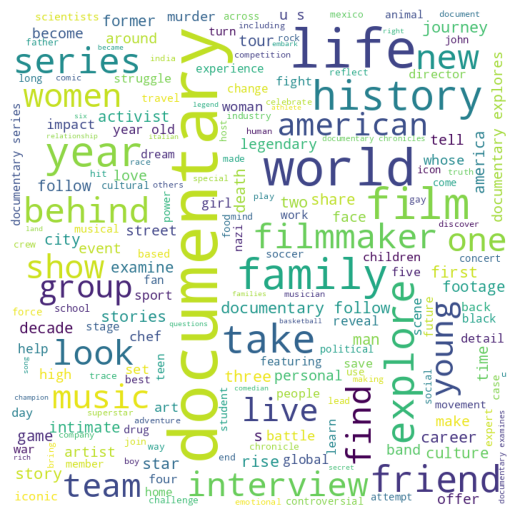

In [ ]:
hierarchical_worldcloud(6)

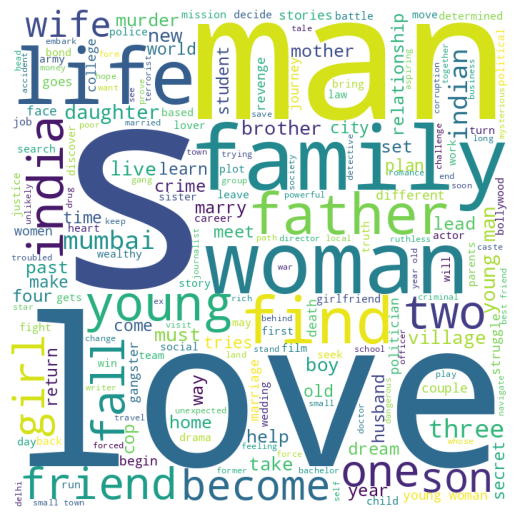

In [ ]:
hierarchical_worldcloud(7)

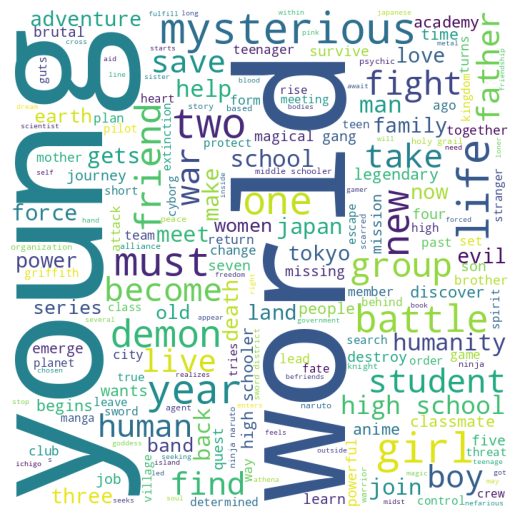

In [ ]:
hierarchical_worldcloud(8)

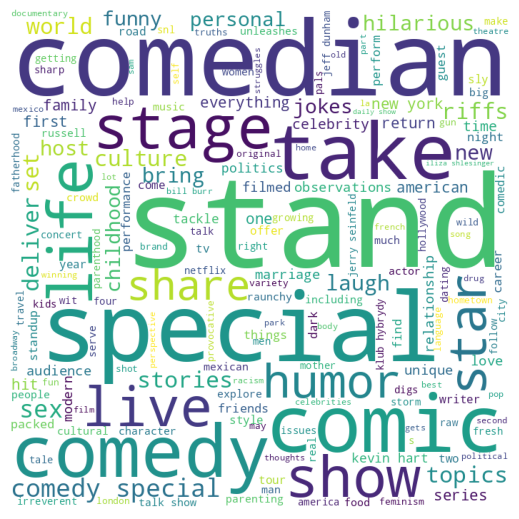

In [ ]:
hierarchical_worldcloud(9)

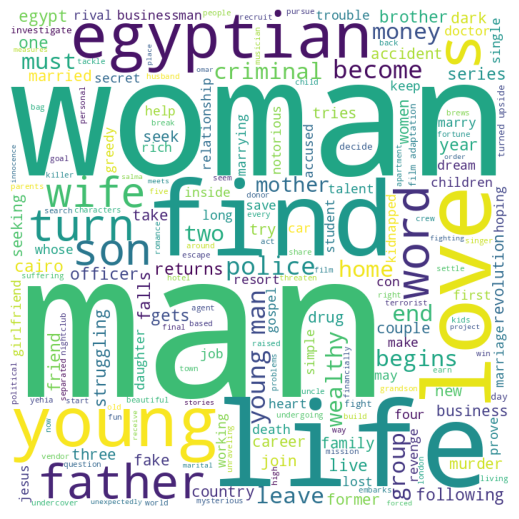

In [ ]:
hierarchical_worldcloud(10)

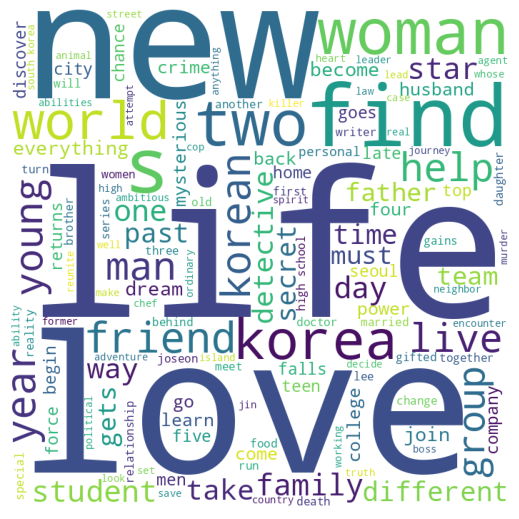

In [ ]:
hierarchical_worldcloud(11)

### ML Model - 3

# Content based recommender system

In [ ]:
df1=df.copy()

In [ ]:
df1['show_id'] = df1.index

In [ ]:
def convert(lst):
  return ' '.join(lst)

df1['clustering_attributes'] = df1['clustering_attributes'].apply(lambda x: convert(x))

In [ ]:
df1.set_index('title',inplace=True)

In [ ]:
# Count vectorizer
from sklearn.feature_extraction.text import CountVectorizer
CV = CountVectorizer()
converted_matrix = CV.fit_transform(df1['clustering_attributes'])

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
cosine_similarity = cosine_similarity(converted_matrix)

In [ ]:
# first 10 recommendations for a show
indices = pd.Series(df1.index)

def rec_system(title, cosine_sim = cosine_similarity):
  try:
    recommend_content = []
    indx = indices[indices == title].index[0]
    series = pd.Series(cosine_sim[indx]).sort_values(ascending = False)
    top10 = list(series.iloc[1:11].index)
    # list with the titles of the best 10 matching movies
    for i in top10:
      recommend_content.append(list(df1.index)[i])
    print("Hey you like '"+title+"', so You may love:\n")
    return recommend_content

  except:
    return 'Invalid Entry'

In [ ]:
rec_system('The Midnight Sky')

Hey you like 'The Midnight Sky', so You may love:



['Good Night, and Good Luck',
 'My Next Guest Needs No Introduction With David Letterman',
 'WHAT DID JACK DO?',
 "George Lopez: We'll Do It For Half",
 'Hail, Caesar!',
 'The Theory of Everything',
 "Ocean's Twelve",
 'The Black Prince',
 'Up in the Air',
 'The Men Who Stare at Goats']

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**



*   Netflix has 5372 movies and 2398 TV shows,there are more number movies on Netflix than TV shows
*   TV-MA has the highest number of ratings for tv shows i,e adult ratings

*   highest number of movies released in 2017 and 2018
*   the most content is added to Netflix from october to january

*   Documentaries are the top most genre in netflix which is followed by stand up comedy and Dramas and international movies
*   most of the movies have duration of between 50 to 150



*   Those movies that have a rating of NC-17 have the longest average duration.
*   united states has the highest number of content on the netflix ,followed by india









### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***